In [2]:
#importing important librarier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.model_selection import GridSearchCV

In [3]:
df=pd.read_csv("titanic.csv")

In [4]:
#Exploring Data
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


# Data Descriptions
Survival: 0 = No, 1 = Yes

pclass (Ticket class): 1 = 1st, 2 = 2nd, 3 = 3rd

sex: Sex

Age: Age in years

sibsp: number of siblings/spouses aboard the Titanic

parch: number of parents/children aboard the Titanic

ticket: Ticket number

fare: Passenger fare

cabin: Cabin number

embarked: Port of Embarkation, C = Cherbourg, Q = Queenstown, S = Southampton

In [5]:
df.shape

(891, 12)

In [ ]:
#there are 891 rows and 12 columns

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
# the are 5 object type variablein the dataset

In [7]:
#checking for null values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
#age and cabin has null values

<AxesSubplot:>

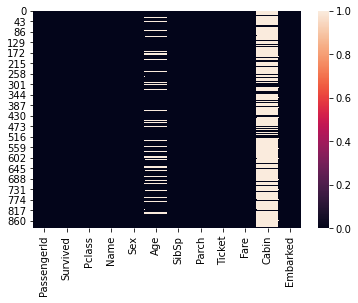

In [8]:
#using heatmap
sns.heatmap(df.isnull())

In [9]:
#since cabin variable has a lot of missing values
#also age variable and embarked has also some nan values 


In [10]:
# How many kinds of ticket are there?
df.Ticket.value_counts()

1601          7
CA. 2343      7
347082        7
347088        6
CA 2144       6
             ..
SW/PP 751     1
236852        1
113509        1
111427        1
A/4. 34244    1
Name: Ticket, Length: 681, dtype: int64

In [11]:
# How many unique kinds of Ticket are there?
print("There are {} unique Ticket values.".format(len(df.Ticket.unique())))

There are 681 unique Ticket values.


In [12]:
#681 unique values is too many for now. So we won't use Ticket in our subset dataframes.

In [13]:
#droping Cabin,Name,Ticket, PassengerID(it has all unique value)

In [14]:
df.drop(["Cabin","Name","Ticket","PassengerId"],axis=1,inplace= True)

In [15]:
#As there are 177 Nan values in Age, however replacing this data with anything may effect out prediction, so we are going to drop them
df.dropna(inplace=True)

In [16]:
df.shape

(712, 8)

In [17]:
#checking for null values
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

<AxesSubplot:>

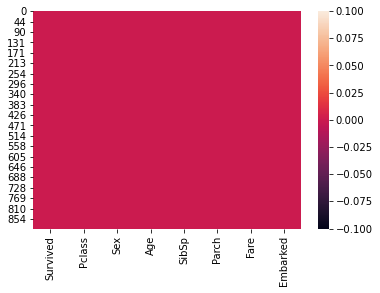

In [18]:
sns.heatmap(df.isnull())

In [19]:
df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
6,0,1,male,54.0,0,0,51.8625,S
7,0,3,male,2.0,3,1,21.0750,S
8,1,3,female,27.0,0,2,11.1333,S
9,1,2,female,14.0,1,0,30.0708,C
10,1,3,female,4.0,1,1,16.7000,S


In [20]:
#converting object varble using labelencoder


In [21]:
from sklearn.preprocessing import LabelEncoder

In [22]:
le=LabelEncoder()
df["Sex"]=le.fit_transform(df["Sex"])
df["Embarked"]=le.fit_transform(df["Embarked"])

In [23]:
df.head(15)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2
6,0,1,1,54.0,0,0,51.8625,2
7,0,3,1,2.0,3,1,21.0750,2
8,1,3,0,27.0,0,2,11.1333,2
9,1,2,0,14.0,1,0,30.0708,0
10,1,3,0,4.0,1,1,16.7000,2


In [24]:
#In label Sex(Female=0, Male=1)
#In Embarked(s=2,c=0,q=1)

In [26]:
#EDA
#univariate analysis


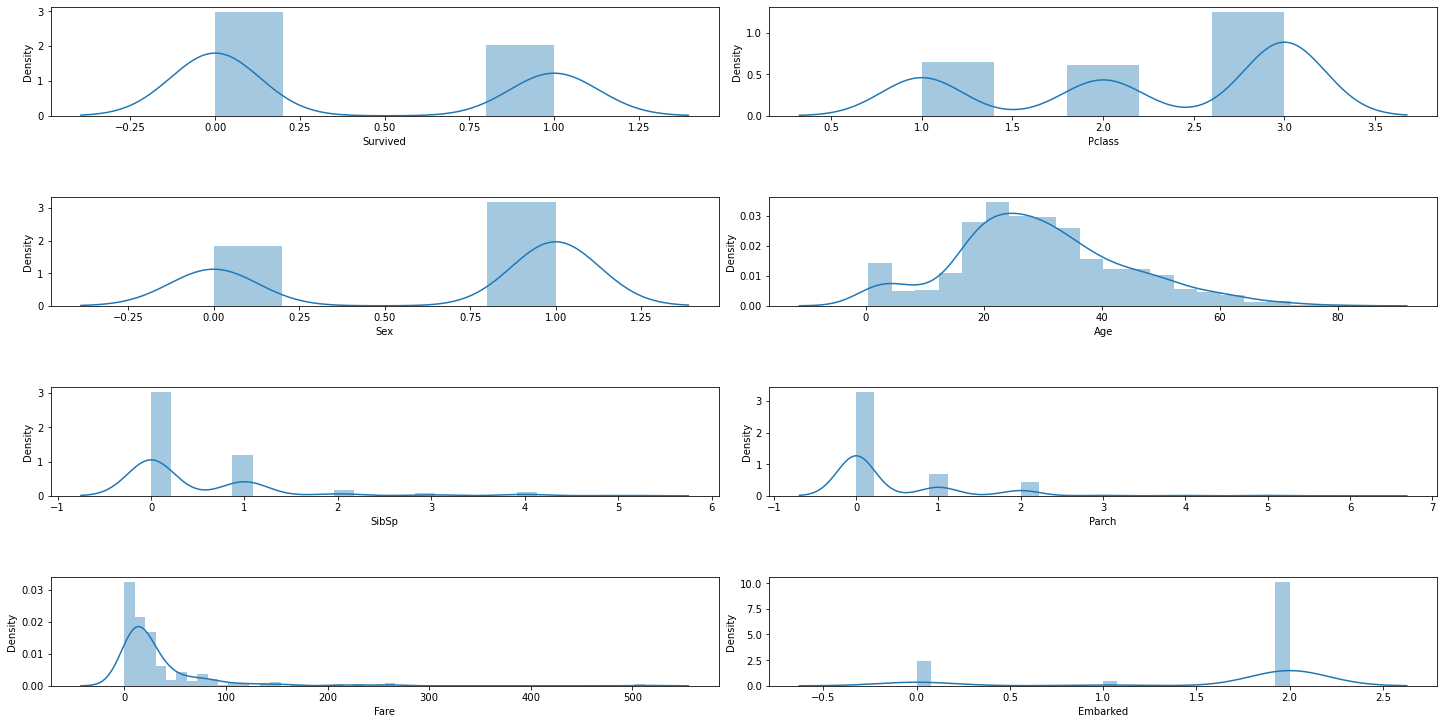

In [27]:
#ploting distplot
fig, ax=plt.subplots(ncols=2,nrows=4, figsize=(20,10))
index=0
ax=ax.flatten()
for col, value in df.items():
    if col != "type":
        sns.distplot(value, ax=ax[index])
        index+=1
plt.tight_layout(pad=0.5,w_pad=0.7,h_pad=5.0)

In [28]:
#graph(1.1)it shows that nearly twice number of people didnt survive in the accident comparing to those who survived.
#graph(1.2)The passengers in 3rd class was highest. while the 1st and 2nd class was somewhere similar in numbers.
#graph(2.1)There were more man in comparison to women.(approx double).
#graph(2.2)The maximum number of people were age group of 20-35. also there were alot of kids onboard also
#graph(3.1)#Majority of people were traveling alone.
#graph(3.4)#Majority of people were traveling with no parents/children.
#graph(4.1)#Majortiy of the fares charged were between 0 and 50. however the maximum fare paid is 500.
#graph(4.2)#From the people onboard alot of people were from Southampton. 

In [29]:
#Bivariate analysis
#we will compare the variable with survived variable

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

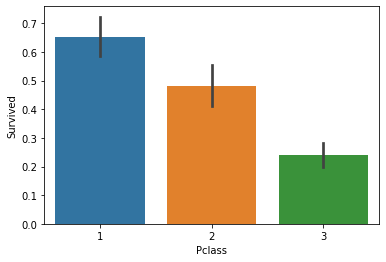

In [30]:
#Pclass/Survived
sns.barplot(x="Pclass",y="Survived", data=df)

In [31]:
#a large number of passenger from class 1 survived. however class3 has least survival rate

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

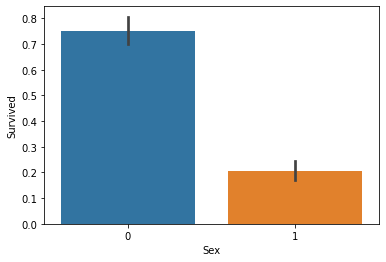

In [32]:
#Sex/Survived
sns.barplot(x="Sex",y="Survived", data=df)

In [33]:
#The survival rate of women was approx more than thrice

<AxesSubplot:xlabel='Survived', ylabel='Age'>

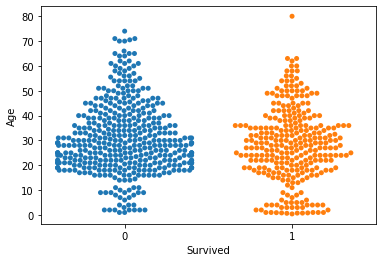

In [34]:
#Age/Survived
sns.swarmplot(x="Survived",y="Age", data=df)

In [35]:
#the graph shows that there were similarity in the age of both who died or survived

<AxesSubplot:xlabel='Survived', ylabel='SibSp'>

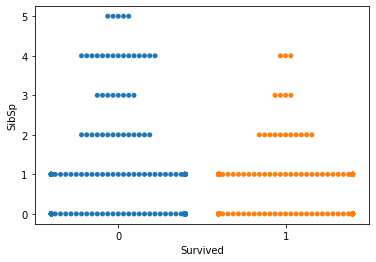

In [36]:
sns.swarmplot(x="Survived",y="SibSp", data=df)

In [37]:
#the people with 5  number of siblings/spouses aboard the Titanic has no survival rate.


<AxesSubplot:xlabel='Survived', ylabel='Parch'>

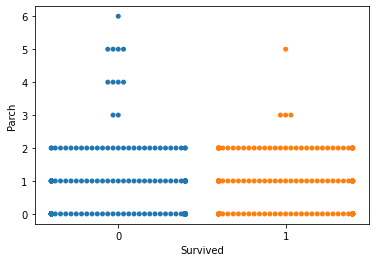

In [38]:
sns.swarmplot(x="Survived",y="Parch", data=df)

In [39]:
#the prople with 6,4 number of parents/children aboard the Titanic has no survival rate.


<AxesSubplot:xlabel='Survived', ylabel='Fare'>

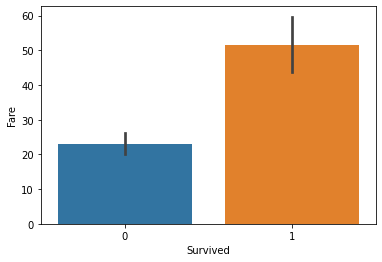

In [40]:
sns.barplot(x="Survived",y="Fare", data=df)

In [41]:
#the people with who paid less fare has less survival rate

<AxesSubplot:xlabel='Embarked', ylabel='Survived'>

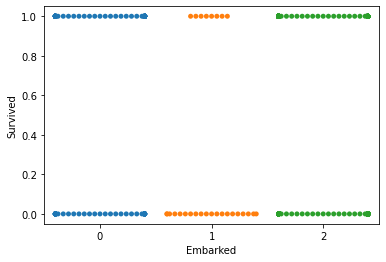

In [42]:
sns.swarmplot(x="Embarked",y="Survived", data=df)

In [43]:
#the survival rate of people from Queenstown is less in comparison to others


In [44]:
#multivariate analysis

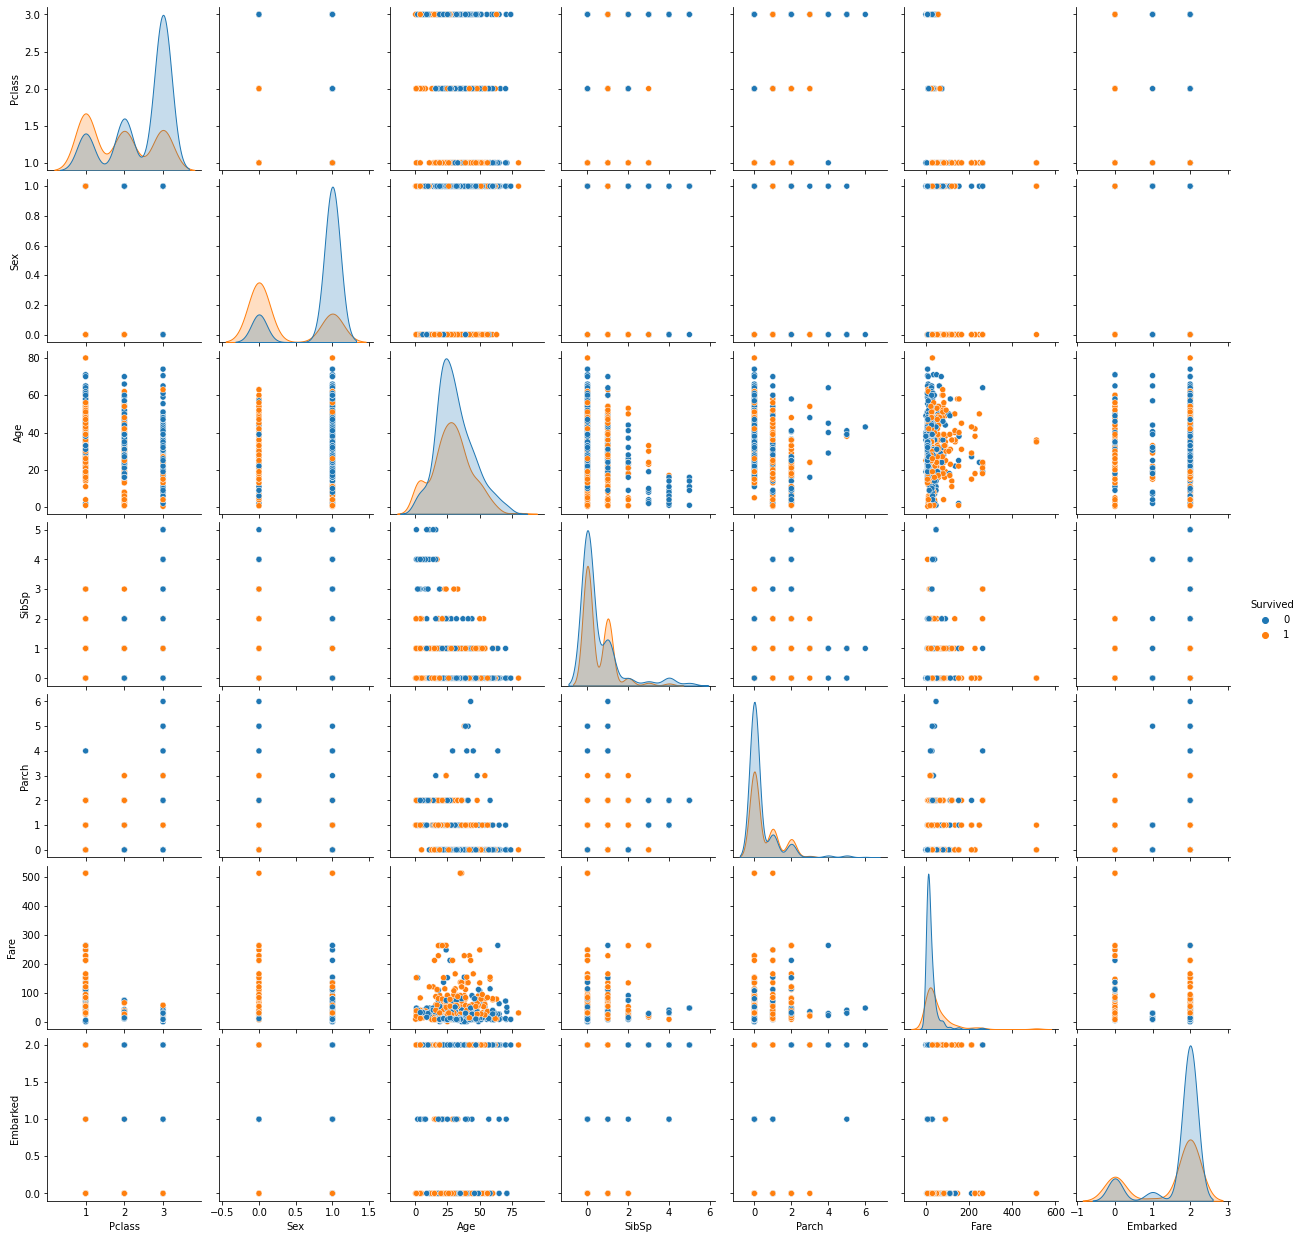

In [45]:
sns.pairplot(df,hue="Survived")

In [46]:
#The passenger of lacss 1 despite of their locality has survuved,
## the first class has maximum survival rate in all the condition

In [47]:
#checking for outliers

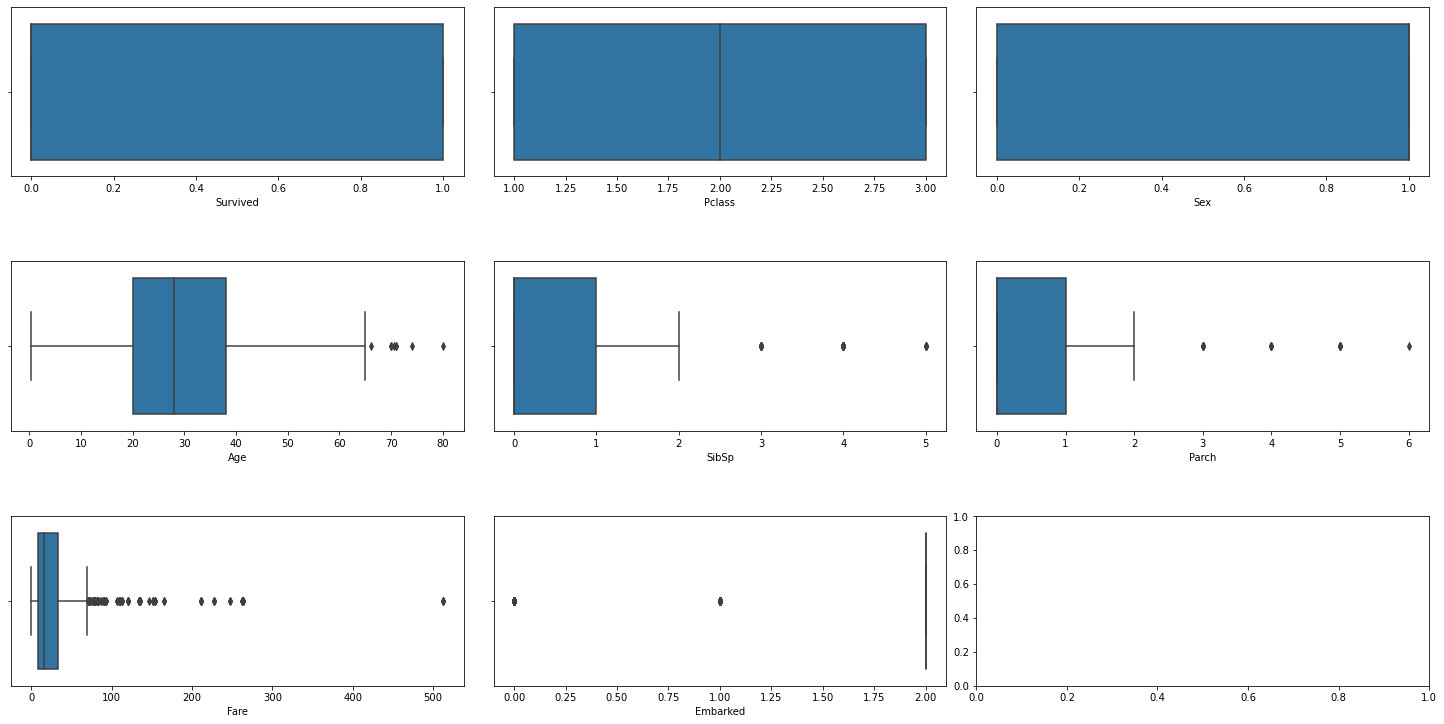

In [48]:
#ploting boxtplot
fig, ax=plt.subplots(ncols=3,nrows=3, figsize=(20,10))
index=0
ax=ax.flatten()
for col, value in df.items():
    if col != "type":
        sns.boxplot(value, ax=ax[index])
        index+=1
plt.tight_layout(pad=0.5,w_pad=0.7,h_pad=5.0)

In [49]:
df.skew()

Survived    0.390010
Pclass     -0.475604
Sex        -0.567570
Age         0.388881
SibSp       2.515107
Parch       2.614177
Fare        4.667009
Embarked   -1.483389
dtype: float64

In [50]:
x=df.drop("Survived",axis=1)
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,2
1,1,0,38.0,1,0,71.2833,0
2,3,0,26.0,0,0,7.9250,2
3,1,0,35.0,1,0,53.1000,2
4,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...
885,3,0,39.0,0,5,29.1250,1
886,2,1,27.0,0,0,13.0000,2
887,1,0,19.0,0,0,30.0000,2
889,1,1,26.0,0,0,30.0000,0


In [51]:
y=df["Survived"]
y

0      0
1      1
2      1
3      1
4      0
      ..
885    0
886    0
887    1
889    1
890    0
Name: Survived, Length: 712, dtype: int64

In [52]:
from sklearn.preprocessing import power_transform


In [53]:
df_new=power_transform(x)

In [54]:
df_new=pd.DataFrame(df_new,columns=x.columns)

In [55]:
df_new.skew()

Pclass     -0.329527
Sex        -0.567570
Age        -0.026801
SibSp       0.701947
Parch       1.039736
Fare       -0.053393
Embarked   -1.360941
dtype: float64

In [56]:
#Tried zscore method and power transform the result is same with skewness.


In [57]:
#spliting train test data

In [58]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=65)

In [59]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((498, 7), (498,), (214, 7), (214,))

In [60]:
def model(name):
    model=name()
    model.fit(x_train,y_train)
    predict=model.predict(x_test)
    print("""The classification report is:
    """,classification_report(y_test, predict))
       
    print("The accuracy score is: ", accuracy_score(y_test,predict))
    
    
    print("""The confusion matrix is:
    
    """,confusion_matrix(y_test,predict))

In [61]:
#DecisionTreeClassifier
model(DecisionTreeClassifier)

The classification report is:
                   precision    recall  f1-score   support

           0       0.78      0.88      0.83       121
           1       0.82      0.67      0.73        93

    accuracy                           0.79       214
   macro avg       0.80      0.78      0.78       214
weighted avg       0.79      0.79      0.79       214

The accuracy score is:  0.7897196261682243
The confusion matrix is:
    
     [[107  14]
 [ 31  62]]


In [62]:
print(cross_val_score(DecisionTreeClassifier(),x,y,cv=5).mean())

0.766935881020388


In [63]:

#RandomForestClassifier
model(RandomForestClassifier)

The classification report is:
                   precision    recall  f1-score   support

           0       0.76      0.93      0.83       121
           1       0.86      0.61      0.72        93

    accuracy                           0.79       214
   macro avg       0.81      0.77      0.77       214
weighted avg       0.80      0.79      0.78       214

The accuracy score is:  0.7897196261682243
The confusion matrix is:
    
     [[112   9]
 [ 36  57]]


In [64]:
print(cross_val_score(RandomForestClassifier(),x,y,cv=5).mean())

0.7950064020486556


In [65]:
#SVC
model(SVC)

The classification report is:
                   precision    recall  f1-score   support

           0       0.62      0.89      0.73       121
           1       0.67      0.28      0.39        93

    accuracy                           0.63       214
   macro avg       0.64      0.59      0.56       214
weighted avg       0.64      0.63      0.58       214

The accuracy score is:  0.6261682242990654
The confusion matrix is:
    
     [[108  13]
 [ 67  26]]


In [66]:
print(cross_val_score(SVC(),x,y,cv=5).mean())

0.6700285629863094


In [67]:
#Naive Bayes
model(GaussianNB)

The classification report is:
                   precision    recall  f1-score   support

           0       0.78      0.81      0.79       121
           1       0.74      0.70      0.72        93

    accuracy                           0.76       214
   macro avg       0.76      0.75      0.76       214
weighted avg       0.76      0.76      0.76       214

The accuracy score is:  0.7616822429906542
The confusion matrix is:
    
     [[98 23]
 [28 65]]


In [68]:
print(cross_val_score(GaussianNB(),x,y,cv=5).mean())

0.7865556978233034


In [69]:
#KNeighborsClassifier
model(KNeighborsClassifier)

The classification report is:
                   precision    recall  f1-score   support

           0       0.68      0.80      0.74       121
           1       0.67      0.52      0.58        93

    accuracy                           0.68       214
   macro avg       0.67      0.66      0.66       214
weighted avg       0.68      0.68      0.67       214

The accuracy score is:  0.677570093457944
The confusion matrix is:
    
     [[97 24]
 [45 48]]


In [70]:
print(cross_val_score(KNeighborsClassifier(),x,y,cv=5).mean())

0.6799369644440066


In [71]:

#ExtraTreeClassifier
model(ExtraTreeClassifier)

The classification report is:
                   precision    recall  f1-score   support

           0       0.72      0.87      0.79       121
           1       0.76      0.56      0.65        93

    accuracy                           0.73       214
   macro avg       0.74      0.71      0.72       214
weighted avg       0.74      0.73      0.73       214

The accuracy score is:  0.7336448598130841
The confusion matrix is:
    
     [[105  16]
 [ 41  52]]


In [72]:
print(cross_val_score(ExtraTreeClassifier(),x,y,cv=5).mean())

0.7430414655766768


In [73]:
#the randomforestclassifier is the best model


In [74]:
#setting parameter for hypertuning
parameter={"max_depth":np.arange(2,10),
          "criterion":["gini","entropy"]
           }

In [75]:

#using GridSearchCV for Hyper parameter tunning
gcv=GridSearchCV(RandomForestClassifier(),parameter,cv=5)

In [76]:
gcv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9])})

In [77]:
#checking best parameters
gcv.best_params_

{'criterion': 'gini', 'max_depth': 5}

In [79]:
#building final model
best_model=RandomForestClassifier(criterion="gini", max_depth=8)
best_model.fit(x_train,y_train)
pred=best_model.predict(x_test)
print("The accuracy score is: ", accuracy_score(y_test,pred))

The accuracy score is:  0.7850467289719626


In [80]:
#savingThemodel
import joblib
joblib.dump(best_model,"titanic.pkl")

['titanic.pkl']